# FYS-STK4155 - Project 1

## By Jørn Marcus Høylo Rosenberg and Andreas Dyve

This Notebook contains both the code for the project and the report. The notebook is structured with each exercise in its own cell(s). This leads to some repeting code, but is practical for the purpose of evaluating each task seperately. (eller noe i denne duren?)

### Table of Contents

* [1. Imported libraries](#imports)
* [2. Functions used throughout the project](#functions)
    * [2.1. Franke function](#frankefunction)
    * [2.2. Cost functions](#costfunctions) 
    * [2.3. Design matrix function](#Xfunction)
    * [2.4. Scaling function](#scalefunction)
* [3. Exercise 1](#3)
    * [3.1. OLS regression](#3.1)
    * [3.2. Confidence intervals](#3.2)
    * [3.3. Discussion on scaling](3.3)
* [4. Exercise 2](#4)
    * [4.1. OLS regression with bootstrap](#4.1)
    * [4.2. bias-variance trade-off](#4.2)
* [5. Exercise 3](#5)
    * [5.1. OLS regression with cross-validation](#5.1)
    * [5.2. Comparison with bootstrap](#5.2)
* [6. Exercise 4](#6)
    * [6.1. Ridge regression with bootstrap and cross-validation](#6.1)
    * [6.2. Discussion of lambda](#6.2)
* [7. Exercise 5](#7)
    * [7.1 Lasso regression with bootstrap and cross-validation](#7.1)
    * [7.2 Evaluation of models](#7.2)
* [8. Exercise 6](#8)

### 1. Imported libraries <a class="anchor" id="imports"></a>

In [3]:
import numpy as np
from random import random, seed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.utils import resample

## Franke function
- Add plot of Franke function

### 2. Functions used throughout the project <a class="anchor" id="functions"></a>

The following functions are used for much of the repetative tasks in this project

#### 2.1. Error functions <a class="anchor" id="errorfunctions"></a>

In [4]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#### 2.2. Franke function <a class="anchor" id="frankefunction"></a>

The provided code in the exercise set is used for making of the Franke function.

In [5]:
def FrankeFunction(x,y,noise_coef):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    noise = noise_coef * np.random.randn(N*N)
    return term1 + term2 + term3 + term4 + noise

#### 2.3. Design matrix function <a class="anchor" id="Xfunction"></a>

The provided code is used for computing the design matrix

In [6]:
def create_X(x, y, n ):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of columns in beta
    X = np.ones((N,l)) 

    for i in range(1,n+1):
        q = int((i)*(i+1)/2) 
        for k in range(i+1): 
            X[:,q+k] = (x**(i-k))*(y**k)

    return X

#### 2.4. Scaling function <a class="anchor" id="scalefunction"></a>

In [7]:
def scale(X_train, X_test, z_train, z_test):
    scaler = StandardScaler() # Utilizing scikit's standardscaler

    scaler_x = scaler.fit(X_train) # Scaling x-data
    X_train_scaled = scaler_x.transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)

    scaler_z = scaler.fit(z_train.reshape(-1,1)) # Scaling z-data
    z_train_scaled = scaler_z.transform(z_train.reshape(-1,1)).ravel()
    z_test_scaled = scaler_z.transform(z_test.reshape(-1,1)).ravel()

    return X_train_scaled, X_test_scaled, z_train_scaled, z_test_scaled

## 3. Exercise 1: OLS on the Franke function <a class="anchor" id="3"></a>

The goal of this task is to do an OLS regression analysis of the Franke function for a polynomial degree up to 5. The OLS is implemented in the following way:
> $ \beta = $ blablba

#### 3.1. OLS regression code <a class="anchor" id="3.1"></a>

The following code creates the dataset and does an OLS regression analysis.

In [8]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Degree: 0   mse train: 1.000000   mse test: 1.440723   r2_train: 0.000000   r2 test: -0.007569
Degree: 1   mse train: 0.552123   mse test: 0.525735   r2_train: 0.447877   r2 test: 0.537482
Degree: 2   mse train: 0.468758   mse test: 0.535676   r2_train: 0.531242   r2 test: 0.619697
Degree: 3   mse train: 0.274178   mse test: 0.417494   r2_train: 0.725822   r2 test: 0.556697
Degree: 4   mse train: 0.273511   mse test: 0.294854   r2_train: 0.726489   r2 test: 0.625667
Degree: 5   mse train: 0.258712   mse test: 0.365581   r2_train: 0.741288   r2 test: 0.702094



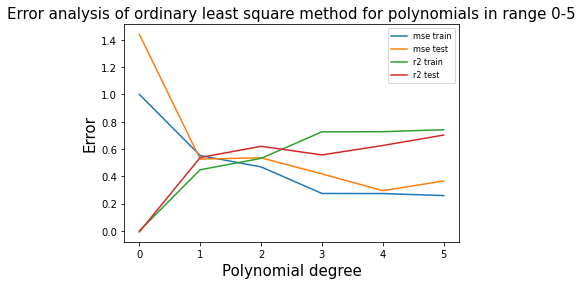

In [9]:
# Making meshgrid of datapoints and compute Franke's function
np.random.seed(64)
maxdegrees = 5
N = 20
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
x_mesh, y_mesh = np.meshgrid(x,y)
x_flat = np.ravel(x_mesh) 
y_flat = np.ravel(y_mesh)

z = FrankeFunction(x_flat, y_flat, 0.15)

polydegree = np.zeros(maxdegrees+1)
r2_train = np.zeros(maxdegrees+1)
r2_test = np.zeros(maxdegrees+1)
mse_train = np.zeros(maxdegrees+1)
mse_test = np.zeros(maxdegrees+1)

# OLS regression for polynomials from 0 to maxdegrees
for i in range(maxdegrees+1):
    degree = i
    polydegree[i] = degree
    X = create_X(x_flat, y_flat, degree)
    X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.2)
    X_train, X_test, z_train, z_test = scale(X_train, X_test, z_train, z_test)
    
    # prediction
    beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train
    zTilde = X_train @ beta
    zPredict = X_test @ beta
    
    # cost functions
    r2_train[i] = r2_score(z_train, zTilde)
    r2_test[i] = r2_score(z_test, zPredict)
    mse_train[i] = MSE(z_train, zTilde) 
    mse_test[i] = MSE(z_test, zPredict)
    
    print('Degree: %i   mse train: %.6f   mse test: %.6f   r2_train: %.6f   r2 test: %.6f'\
          %(degree, mse_train[i], mse_test[i], r2_train[i], r2_test[i]))

print("")
plt.plot(polydegree, mse_train, label='mse train')
plt.plot(polydegree, mse_test, label='mse test')
plt.plot(polydegree, r2_train, label='r2 train')
plt.plot(polydegree, r2_test, label='r2 test')
plt.title("Error analysis of ordinary least square method for polynomials in range 0-5")
plt.xlabel("Polynomial degree")
plt.ylabel("Error")
plt.legend()
plt.show()

#### 3.2. Confidence intervals <a class="anchor" id="3.2"></a>

- $\mu_{\beta} \pm \frac{2\sigma_{\beta}}{\sqrt{n}}$

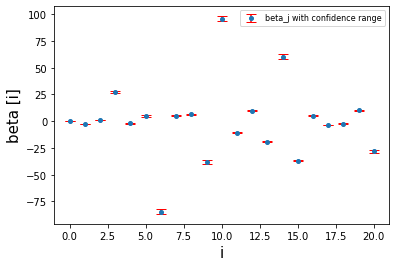

,Beta,+-
0,0.000000,0.000000
1,-2.424012,0.165874
2,0.819659,0.135176
3,27.060031,0.968650
4,-2.015274,0.298624
5,4.825851,0.858652
6,-84.476240,2.172119
7,5.214781,0.634127
8,6.417323,0.640296
9,-38.070800,2.185273


In [10]:
_str = len(beta)
variance = np.zeros(_str)
CI = np.zeros(_str)

for i in range(_str):
    variance[i] = 0.1**2 * np.linalg.pinv(X_train.T @ X_train)[i,i]
    CI[i] = 2*np.sqrt(variance[i])/np.sqrt(N)

print("")
plt.errorbar(np.arange(0,_str), beta, yerr=CI, fmt='o', ecolor='red', capsize=5, markersize=4, label='beta_j with confidence range')
plt.xlabel('i')
plt.ylabel('beta [i]')
plt.legend()
plt.show()

table = pd.DataFrame({'Beta': beta, '+-': CI})
table

#### 3.3 Discussion on scaling <a class="anchor" id="3.3"></a>

### 4. Exercise 2 - Bias-variance trade-off and resampling techniques 
<a class="anchor" id="4"></a>

#### Notes
- scaling or not scaling - no difference as expected (ref notes exercise 1)
- Increasing from 50 bootstraps gives no improved results
- Increasing N from 100 only smoothens the curve
- Polynomial degree above 10 does not decrease errors

#### 4.1. OLS regression with bootstrap resampling <a class="anchor" id="4.1"></a>

                 MSE         Bias      Variance
degree: 0      1.4407       1.4407      0.0000
degree: 1      0.5827       0.5797      0.0030
degree: 2      0.5599       0.5524      0.0075
degree: 3      0.2869       0.2710      0.0159
degree: 4      0.3324       0.3148      0.0176
degree: 5      0.4372       0.3745      0.0627
degree: 6      0.2672       0.2447      0.0226
degree: 7      0.3934       0.3323      0.0611
degree: 8      0.4674       0.3728      0.0946
degree: 9      1.8366       0.5225      1.3142
degree: 10      3.9732       0.5848      3.3884
degree: 11      3.4979       0.7770      2.7209



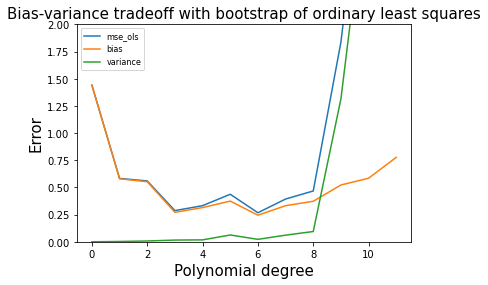

In [11]:
# Parameters
N = 20
n_bootstraps = 1000
maxdegree = 12

# Create data
np.random.seed(64)
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
x_mesh, y_mesh = np.meshgrid(x,y)
x_flat = np.ravel(x_mesh)
y_flat = np.ravel(y_mesh)

z = FrankeFunction(x_flat, y_flat, 0.15)

# Cost functions
mse = np.zeros(maxdegree)
r2 = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)

polydegree = np.zeros(maxdegree)
print("                 MSE         Bias      Variance")
for i in range(maxdegree):
    degree = i
    polydegree[i] = degree
    X = create_X(x_flat, y_flat, degree)

    X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.2)
    X_train, X_test, z_train, z_test = scale(X_train, X_test, z_train, z_test)

    z_pred = np.empty((z_test.shape[0], n_bootstraps))
    for j in range(n_bootstraps):
        x_bs,z_bs = resample(X_train, z_train)
        beta_ols = np.linalg.pinv(x_bs.T @ x_bs) @ x_bs.T @ z_bs
        z_pred[:,j] = X_test @ beta_ols
    
    mse[i] = np.mean(np.mean((z_test.reshape(-1,1) - z_pred)**2, axis=1, keepdims=True))
    bias[i] = np.mean((z_test.reshape(-1,1) - np.mean(z_pred, axis=1, keepdims=True))**2)
    variance[i] = np.mean(np.var(z_pred, axis=1, keepdims=True))
    
    print('degree: %i      %.4f       %.4f      %.4f'%(degree, mse[i], bias[i], variance[i])) 
    
print("")
plt.plot(polydegree, mse, label='mse_ols')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='variance')
plt.title("Bias-variance tradeoff with bootstrap of ordinary least squares")
plt.xlabel('Polynomial degree')
plt.ylabel('Error')
plt.ylim(0,2)
plt.legend()
plt.show()

#### 4.2. Discussion of bias-variance trade-off <a class="anchor" id="4.2"></a>

### 5. Exercise 3 - Cross validation as resampling technique, adding more complexity 
<a class="anchor" id="5"></a>

#### 5.1. OLS regression with cross-validation resampling <a class="anchor" id="5.1"></a>

degree: 0    MSE: 1.014967
degree: 1    MSE: 0.543536
degree: 2    MSE: 0.460891
degree: 3    MSE: 0.327560
degree: 4    MSE: 0.314723
degree: 5    MSE: 0.298608
degree: 6    MSE: 0.283374
degree: 7    MSE: 0.293943
degree: 8    MSE: 0.320473
degree: 9    MSE: 0.368816
degree: 10    MSE: 0.451438
degree: 11    MSE: 0.619847



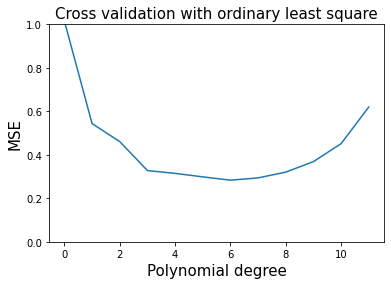

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Parameters
N = 20
maxdegree = 12
k = 10
kfold = KFold(n_splits = k, shuffle=True, random_state=22)

# Make dataset
np.random.seed(64)
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
x_mesh, y_mesh = np.meshgrid(x,y)
x_flat = np.ravel(x_mesh)
y_flat = np.ravel(y_mesh)
z = FrankeFunction(x_flat, y_flat, 0.15)

mse_scikit_cv = None

# Cost function
mse_ols_cvd = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)

for i in range(maxdegree):
    degree = i
    polydegree[i] = degree
    X = create_X(x_flat, y_flat, degree)
    mse_split = np.zeros(k)
    cv_split = 0
    for train_indexes, test_indexes in kfold.split(X):
        X_train = X[train_indexes]
        X_test = X[test_indexes]
        z_train = z[train_indexes]
        z_test = z[test_indexes]
        X_train, X_test, z_train, z_test = scale(X_train, X_test, z_train, z_test)

        beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train
        z_pred = X_test @ beta
        
        mse_split[cv_split] = mean_squared_error(z_test, z_pred)
        
        cv_split += 1
    
    mse_ols_cvd[i] = np.mean(mse_split)
    
    #Compare with scikit-learn
    '''
    linreg = LinearRegression()
    mse_scikit_cv = np.mean(cross_val_score(linreg, X, z, scoring='neg_mean_squared_error', cv=kfold))
    '''
    
    if (mse_scikit_cv != None):
        print('degree: %i    MSE: %.6f    scikit mse: %.6f' %(degree, mse_ols_cvd[i], mse_scikit_cv))
    else:
        print('degree: %i    MSE: %.6f' %(degree, mse_ols_cvd[i]))

print("")
plt.plot(polydegree, mse_ols_cvd)
plt.ylim(0,1)
plt.title("Cross validation with ordinary least square")
plt.ylabel("MSE")
plt.xlabel("Polynomial degree")
plt.show()    


#### 5.2. Comments <a class="anchor" id="5.2"></a>

### 6. Exercise 4 - Ridge regression on the Franke function with resampling
<a class="anchor" id="4"></a>

- Ridge: Shrinking beta-coefficients with large variance, but never to zero
- Lasso: Same, but can shrink to zero
- Noisy function means large variance
- To compare OLS/ridge/beta, try to compute coefficients and see with/without noise
- Beta coefficients in ridge are given by Gaussian distribution, in Lasso they are given by Laplace distribution (thats why they can go to zero)

- Scaling: Subtracting the mean value means first column of design matrix (1,1,1,...) becomes zero.

#### 6.1. Ridge regression with bootstrap and cross validation <a class="anchor" id="6.1"></a>

RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING


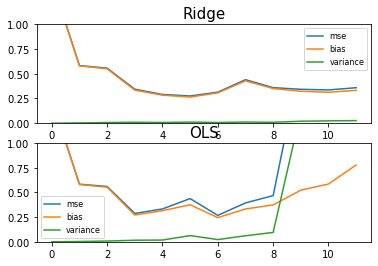

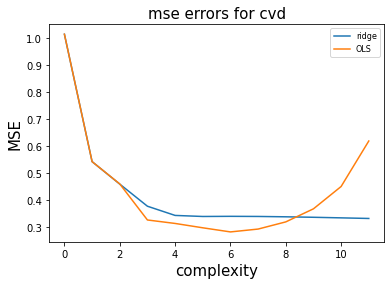

In [13]:
N = 20
np.random.seed(64)
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
x_mesh, y_mesh = np.meshgrid(x,y)
x_flat = np.ravel(x_mesh)
y_flat = np.ravel(y_mesh)

z = FrankeFunction(x_flat, y_flat, 0.15) 

#Bootstrap parameters
n_bootstraps = 1000
maxdegree = 12

#cross_validation parameters
k = 10
kfold = KFold(n_splits = k, shuffle=True, random_state=22)

polydegrees = np.zeros(maxdegree)

#Error arrays
mse_ridge_bootstrap = np.zeros(maxdegree)
mse_ols_bootstrap = np.zeros(maxdegree)

bias_ridge_bootstrap = np.zeros(maxdegree)
bias_ols_bootstrap = np.zeros(maxdegree)

variance_ridge_bootstrap = np.zeros(maxdegree)
variance_ols_bootstrap = np.zeros(maxdegree)

mse_ridge_cvd = np.zeros(maxdegree)
mse_ols_cvd = np.zeros(maxdegree)


lmd = 1

for i in range(maxdegree):
    print('RUNNING')
    degree = i
    polydegrees[i] = degree
    X = create_X(x_flat, y_flat, degree)
    X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.2)
    X_train, X_test, z_train, z_test = scale(X_train, X_test, z_train, z_test)
    
    #Bootstrap
    z_pred_ridge_bootstrap = np.empty((z_test.shape[0], n_bootstraps))
    z_pred_ols_bootstrap = np.empty((z_test.shape[0], n_bootstraps))
    for j in range(n_bootstraps):

        x_bs,z_bs = resample(X_train,z_train)
        
        I_ = np.eye(X_train.shape[1], X_train.shape[1])
        
        beta_ridge_bootstrap = np.linalg.pinv(x_bs.T @ x_bs + lmd*I_) @ x_bs.T @ z_bs
        beta_ols_bootstrap = np.linalg.pinv(x_bs.T @ x_bs) @ x_bs.T @ z_bs
        
        z_pred_ols_bootstrap[:,j] = X_test @ beta_ols_bootstrap
        z_pred_ridge_bootstrap[:,j] = X_test @ beta_ridge_bootstrap
        
    #Bootstrap errors
    mse_ridge_bootstrap[i] = np.mean(np.mean((z_test.reshape(-1,1) - z_pred_ridge_bootstrap)**2, axis=1, keepdims=True))
    mse_ols_bootstrap[i] = np.mean(np.mean((z_test.reshape(-1,1) - z_pred_ols_bootstrap)**2, axis=1, keepdims=True))
    
    bias_ridge_bootstrap[i] = np.mean((z_test.reshape(-1,1) - np.mean(z_pred_ridge_bootstrap, axis=1, keepdims=True))**2)
    bias_ols_bootstrap[i] = np.mean((z_test.reshape(-1,1) - np.mean(z_pred_ols_bootstrap, axis=1, keepdims=True))**2)
    
    variance_ridge_bootstrap[i] = np.mean(np.var(z_pred_ridge_bootstrap, axis=1, keepdims=True))
    variance_ols_bootstrap[i] = np.mean(np.var(z_pred_ols_bootstrap, axis=1, keepdims=True)) 
    
    #Cross-validation
    cv_split = 0
    mse_ols_cvd_split = np.zeros(k)
    mse_ridge_cvd_split = np.zeros(k)
    for train_indexes, test_indexes in kfold.split(X):
        X_train = X[train_indexes]; X_test = X[test_indexes]
        z_train = z[train_indexes]; z_test = z[test_indexes]
        X_train, X_test, z_train, z_test = scale(X_train, X_test, z_train, z_test)
        
        I_ = np.eye(X_train.shape[1], X_train.shape[1])
        
        beta_ols_cvd = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train
        z_pred_ols_cvd = X_test @ beta_ols_cvd
        
        beta_ridge_cvd = np.linalg.pinv(X_train.T @ X_train + lmd*I_) @ X_train.T @ z_train
        z_pred_ridge_cvd = X_test @ beta_ridge_cvd
        
        mse_ols_cvd_split[cv_split] = mean_squared_error(z_test, z_pred_ols_cvd)
        mse_ridge_cvd_split[cv_split] = mean_squared_error(z_test, z_pred_ridge_cvd)
    
        cv_split += 1
    
    # Cvd errors
    mse_ridge_cvd[i] = np.mean(mse_ridge_cvd_split)
    mse_ols_cvd[i] = np.mean(mse_ols_cvd_split)


# Plot results 
fig,ax = plt.subplots(2, sharey=True)
ax[0].plot(polydegrees, mse_ridge_bootstrap, label='mse')
ax[0].plot(polydegrees, bias_ridge_bootstrap, label='bias')
ax[0].plot(polydegrees, variance_ridge_bootstrap, label='variance')
ax[0].set_ylim(0,1)
ax[0].legend()
ax[0].set_title('Ridge')

ax[1].plot(polydegrees, mse_ols_bootstrap, label='mse')
ax[1].plot(polydegrees, bias_ols_bootstrap, label='bias')
ax[1].plot(polydegrees, variance_ols_bootstrap, label='variance')
ax[1].legend()
ax[1].set_title('OLS')
plt.show()

fig,ax = plt.subplots(1, sharey=True)
ax.plot(polydegrees, mse_ridge_cvd, label='ridge')
ax.plot(polydegrees, mse_ols_cvd, label='OLS')
ax.set_xlabel('complexity')
ax.set_ylabel('MSE')
ax.legend()
plt.title('mse errors for cvd')
plt.show()

#### 6.2. Discussion of lambda dependence <a class="anchor" id="6.2"></a>

#### 6.3. Discussion of bias-variance trade-off  <a class="anchor" id="6.3"></a>

### 7. Exercise 5 - Lasso Regression on the Franke function with resampling
<a class="anchor" id="7"></a>

#### 7.1. Lasso regression

Polynomial degree: 0
Bootstrap


,mse,bias,variance
regression type,,,
OLS,0.843747,0.843747,0.0
ridge,0.843747,0.843747,0.0
lasso,0.843747,0.843747,0.0



Polynomial degree: 1
Bootstrap


,mse,bias,variance
regression type,,,
OLS,0.607928,0.604509,3.419217e-03
ridge,0.607928,0.604509,3.419192e-03
lasso,0.604411,0.604411,5.980915e-33



Polynomial degree: 2
Bootstrap


,mse,bias,variance
regression type,,,
OLS,0.409322,0.403398,5.923377e-03
ridge,0.409328,0.403405,5.922615e-03
lasso,0.411023,0.411023,9.957509e-33



Polynomial degree: 3
Bootstrap


,mse,bias,variance
regression type,,,
OLS,0.359180,0.348444,1.073560e-02
ridge,0.358822,0.348148,1.067400e-02
lasso,0.341856,0.341856,6.223312e-33



Polynomial degree: 4
Bootstrap


,mse,bias,variance
regression type,,,
OLS,0.291978,0.277265,1.471280e-02
ridge,0.291104,0.277442,1.366164e-02
lasso,0.318580,0.318580,8.884558e-33



Polynomial degree: 5
Bootstrap


,mse,bias,variance
regression type,,,
OLS,0.379887,0.340464,3.942309e-02
ridge,0.375625,0.347772,2.785252e-02
lasso,0.340905,0.340905,1.042470e-32



Polynomial degree: 6
Bootstrap


,mse,bias,variance
regression type,,,
OLS,0.322970,0.295827,2.714375e-02
ridge,0.263235,0.248432,1.480351e-02
lasso,0.296590,0.296590,9.603770e-33



Polynomial degree: 7
Bootstrap


,mse,bias,variance
regression type,,,
OLS,0.452528,0.340085,1.124438e-01
ridge,0.321480,0.302812,1.866787e-02
lasso,0.314041,0.314041,1.421652e-32



Polynomial degree: 8
Bootstrap


,mse,bias,variance
regression type,,,
OLS,0.401902,0.333997,6.790437e-02
ridge,0.314111,0.287419,2.669249e-02
lasso,0.357353,0.357353,1.144499e-32



Polynomial degree: 9
Bootstrap


,mse,bias,variance
regression type,,,
OLS,1.809725,0.736006,1.073718e+00
ridge,0.396198,0.358934,3.726407e-02
lasso,0.393744,0.393744,8.239971e-33



Polynomial degree: 10
Bootstrap


,mse,bias,variance
regression type,,,
OLS,0.647872,0.379949,2.679228e-01
ridge,0.344034,0.314409,2.962481e-02
lasso,0.362738,0.362738,6.406726e-33



Polynomial degree: 11
Bootstrap


,mse,bias,variance
regression type,,,
OLS,0.810390,0.333351,4.770391e-01
ridge,0.333573,0.308765,2.480751e-02
lasso,0.356507,0.356507,7.534458e-33


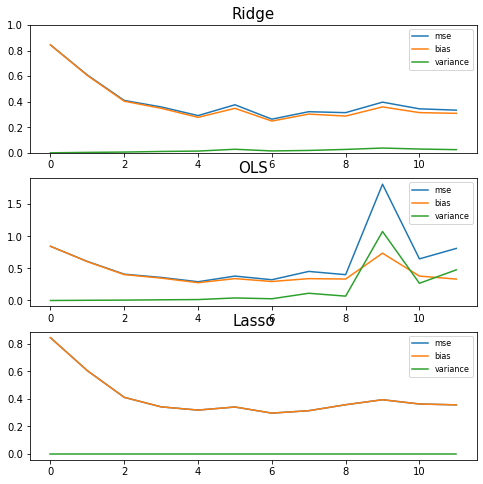

In [27]:
from sklearn.linear_model import Lasso

# Make data
N = 20
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
x_mesh, y_mesh = np.meshgrid(x,y)
x_flat = np.ravel(x_mesh)
y_flat = np.ravel(y_mesh)
np.random.seed(64)

z = FrankeFunction(x_flat, y_flat, 0.15) 

# Bootstrap parameters
n_bootstraps = 50
maxdegree = 12

# Cross-validation parameters
k = 5
kfold = KFold(n_splits = k, shuffle=True, random_state=22)

polydegrees = np.zeros(maxdegree)

#Error arrays

# Bootstrap
mse_ols_bootstrap = np.zeros(maxdegree)
mse_ridge_bootstrap = np.zeros(maxdegree)
mse_lasso_bootstrap = np.zeros(maxdegree)

bias_ols_bootstrap = np.zeros(maxdegree)
bias_ridge_bootstrap = np.zeros(maxdegree)
bias_lasso_bootstrap = np.zeros(maxdegree)

variance_ols_bootstrap = np.zeros(maxdegree)
variance_ridge_bootstrap = np.zeros(maxdegree)
variance_lasso_bootstrap = np.zeros(maxdegree)

# cvd
mse_ols_cvd = np.zeros(maxdegree)
mse_ridge_cvd = np.zeros(maxdegree)
mse_lasso_cvd = np.zeros(maxdegree)

lmd = 0.001
for i in range(maxdegree):
    degree = i
    polydegrees[i] = degree
    print("Polynomial degree: %i" %(i))
    
    X = create_X(x_flat, y_flat, degree)
    
    

    # Bootstrap
    X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.2)
    X_train, X_test, z_train, z_test = scale(X_train, X_test, z_train, z_test)
    
    z_pred_ridge_bootstrap = np.empty((z_test.shape[0], n_bootstraps))
    z_pred_ols_bootstrap = np.empty((z_test.shape[0], n_bootstraps))
    z_pred_lasso_bootstrap = np.empty((z_test.shape[0], n_bootstraps))
    
    print("Bootstrap")
    for j in range(n_bootstraps):
        x_bs,z_bs = resample(X_train,z_train)
        
        beta_ols_bootstrap = np.linalg.pinv(x_bs.T @ x_bs) @ x_bs.T @ z_bs
        beta_ridge_bootstrap = np.linalg.pinv(x_bs.T @ x_bs + lmd*np.eye(x_bs.shape[1],x_bs.shape[1])) @ x_bs.T @ z_bs
        
        z_pred_ols_bootstrap[:,j] = X_test @ beta_ols_bootstrap
        z_pred_ridge_bootstrap[:,j] = X_test @ beta_ridge_bootstrap
        
        reglasso_bootstrap = Lasso(lmd, max_iter=1e5, tol=0.1)
        reglasso_bootstrap.fit(X_train, z_train)
        z_pred_lasso_bootstrap[:,j] = reglasso_bootstrap.predict(X_test)
    
    
    mse_ols_bootstrap[i] = np.mean(np.mean((z_test.reshape(-1,1) - z_pred_ols_bootstrap)**2, axis=1, keepdims=True))
    mse_ridge_bootstrap[i] = np.mean(np.mean((z_test.reshape(-1,1) - z_pred_ridge_bootstrap)**2, axis=1, keepdims=True))
    mse_lasso_bootstrap[i] = np.mean(np.mean((z_test.reshape(-1,1) - z_pred_lasso_bootstrap)**2, axis=1, keepdims=True))
    
    bias_ols_bootstrap[i] = np.mean((z_test.reshape(-1,1) - np.mean(z_pred_ols_bootstrap, axis=1, keepdims=True))**2)
    bias_ridge_bootstrap[i] = np.mean((z_test.reshape(-1,1) - np.mean(z_pred_ridge_bootstrap, axis=1, keepdims=True))**2)
    bias_lasso_bootstrap[i] = np.mean((z_test.reshape(-1,1) - np.mean(z_pred_lasso_bootstrap, axis=1, keepdims=True))**2)
    
    variance_ols_bootstrap[i] = np.mean(np.var(z_pred_ols_bootstrap, axis=1, keepdims=True))
    variance_ridge_bootstrap[i] = np.mean(np.var(z_pred_ridge_bootstrap, axis=1, keepdims=True))
    variance_lasso_bootstrap[i] = np.mean(np.var(z_pred_lasso_bootstrap, axis=1, keepdims=True))
    
    # Table for displaying mse, bias and variance for the different regression methods
    table = pd.DataFrame({'regression type': ['OLS', 'ridge', 'lasso'],\
                          'mse': [mse_ols_bootstrap[i], mse_ridge_bootstrap[i], mse_lasso_bootstrap[i]], \
                          'bias': [bias_ols_bootstrap[i], bias_ridge_bootstrap[i], bias_lasso_bootstrap[i]], \
                          'variance':[variance_ols_bootstrap[i], variance_ridge_bootstrap[i], variance_lasso_bootstrap[i]]})
    table = table.set_index('regression type')
    display(table)
    print("")
    """
    print("OLS     %.5f     %.5f     %.5f"\
          %(mse_ols_bootstrap[i],bias_ols_bootstrap[i],variance_ols_bootstrap[i]))
    
    print("Ridge   %.5f     %.5f     %.5f"\
          %(mse_ridge_bootstrap[i],bias_ridge_bootstrap[i],variance_ridge_bootstrap[i]))
   
    print("Lasso   %.5f     %.5f     %.5f"\
          %(mse_lasso_bootstrap[i],bias_lasso_bootstrap[i],variance_lasso_bootstrap[i]))
    """
    
    # cvd
    cv_split = 0
    mse_ols_cvd_split = np.zeros(k)
    mse_ridge_cvd_split = np.zeros(k)
    mse_lasso_cvd_split = np.zeros(k)
    
    print("")
    print("Cross-validation mse errors")
    print("             ols        ridge     lasso")
    for train_indexes, test_indexes in kfold.split(X):
        
        # Split and scale
        X_train = X[train_indexes]
        X_test = X[test_indexes]
        z_train = z[train_indexes]
        z_test = z[test_indexes]
        X_train, X_test, z_train, z_test = scale(X_train, X_test, z_train, z_test)
        
        # Make beta
        I_ = np.eye(X_train.shape[1], X_train.shape[1])
        beta_ols_cvd = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train
        beta_ridge_cvd = np.linalg.pinv(X_train.T @ X_train + lmd*I_) @ X_train.T @ z_train
        
        # Predictions
        z_pred_ols_cvd = X_test @ beta_ols_cvd
        z_pred_ridge_cvd = X_test @ beta_ridge_cvd
        
        reglasso_cvd = Lasso(lmd, max_iter=1e5, tol=0.1)
        reglasso_cvd.fit(X_train, z_train)
        z_pred_lasso_cvd = reglasso_cvd.predict(X_test)
        
        # Errors
        mse_ols_cvd_split[cv_split] = mean_squared_error(z_test, z_pred_ols_cvd)
        mse_ridge_cvd_split[cv_split] = mean_squared_error(z_test, z_pred_ridge_cvd)
        mse_lasso_cvd_split[cv_split] = mean_squared_error(z_test, z_pred_lasso_cvd)
        
        print("Split: %i    %.5f    %.5f    %.5f"\
              %(cv_split+1, mse_ols_cvd_split[cv_split], mse_ridge_cvd_split[cv_split]\
                ,mse_lasso_cvd_split[cv_split]))
        
        
        cv_split += 1
    
    # Cvd errors
    mse_ridge_cvd[i] = np.mean(mse_ridge_cvd_split)
    mse_ols_cvd[i] = np.mean(mse_ols_cvd_split)
    mse_lasso_cvd[i] = np.mean(mse_lasso_cvd_split)
    
    
    """
    print(" ")
    print("Avg cvd OLS mse for polynomial degree %i: %.5f" %(degree, mse_ols_cvd[i]))
    print("Avg cvd Ridge mse for polynomial degree %i: %.5f" %(degree, mse_ridge_cvd[i]))
    print("Avg cvd Lasso mse for polynomial degree %i: %.5f" %(degree, mse_lasso_cvd[i]))
    print(" ")
    """
    

# Bootstrap plots
fig,ax = plt.subplots(3,figsize=(8,8))
ax[0].plot(polydegrees, mse_ridge_bootstrap, label='mse')
ax[0].plot(polydegrees, bias_ridge_bootstrap, label='bias')
ax[0].plot(polydegrees, variance_ridge_bootstrap, label='variance')
ax[0].set_ylim(0,1)
ax[0].legend()
ax[0].set_title('Ridge')

ax[1].plot(polydegrees, mse_ols_bootstrap, label='mse')
ax[1].plot(polydegrees, bias_ols_bootstrap, label='bias')
ax[1].plot(polydegrees, variance_ols_bootstrap, label='variance')
ax[1].legend()
ax[1].set_title('OLS')

ax[2].plot(polydegrees, mse_lasso_bootstrap, label='mse')
ax[2].plot(polydegrees, bias_lasso_bootstrap, label='bias')
ax[2].plot(polydegrees, variance_lasso_bootstrap, label='variance')
ax[2].legend()
ax[2].set_title('Lasso')

# cvd plot
fig,ax = plt.subplots(1)
ax.plot(polydegrees, mse_ridge_cvd, label='ridge')
ax.plot(polydegrees, mse_ols_cvd, label='OLS')
ax.plot(polydegrees, mse_lasso_cvd, label='lasso')
ax.set_xlabel('complexity')
ax.set_ylabel('MSE')
ax.legend()
plt.title('mse errors for cvd')

plt.show()

#### 7.2. Evaluation of methods  <a class="anchor" id="7.2"></a>